# KNN Model

## 1. Import libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## 2. Đọc Dataset và chia data thành 2 bộ train và test

In [2]:
# Đọc dữ liệu từ file CSV, lấy các cột cần thiết và phân tích cột 'Date' làm chỉ mục
df = pd.read_csv('../Data/gld_price_data.csv', index_col='Date', parse_dates=True, usecols=['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'])
# df.sort_values(by='Date', ascending=True, inplace=True)
# df.reset_index(inplace=True)

# Loại bỏ các dòng có giá trị thiếu (NaN) trong dữ liệu
df = df.dropna()

# Tách dữ liệu thành train_data và test_data theo tỉ lệ 80:20
train_data, test_data = train_test_split(df, test_size=0.2, shuffle=False)

# In kích thước của tập dữ liệu huấn luyện
print('Shape of data train', train_data.shape)

# In kích thước của tập dữ liệu kiểm tra
print('Shape of data test', test_data.shape)

# Tách biến mục tiêu 'GLD' từ tập dữ liệu huấn luyện
y_train = train_data['GLD']
y_test = test_data['GLD']

# Tách các biến đầu vào (features) từ tập dữ liệu huấn luyện, loại bỏ cột 'GLD'
X_train = train_data.drop(columns=['GLD'])
X_test = test_data.drop(columns=['GLD'])

Shape of data train (1832, 5)
Shape of data test (458, 5)


## 3. Dataset overview

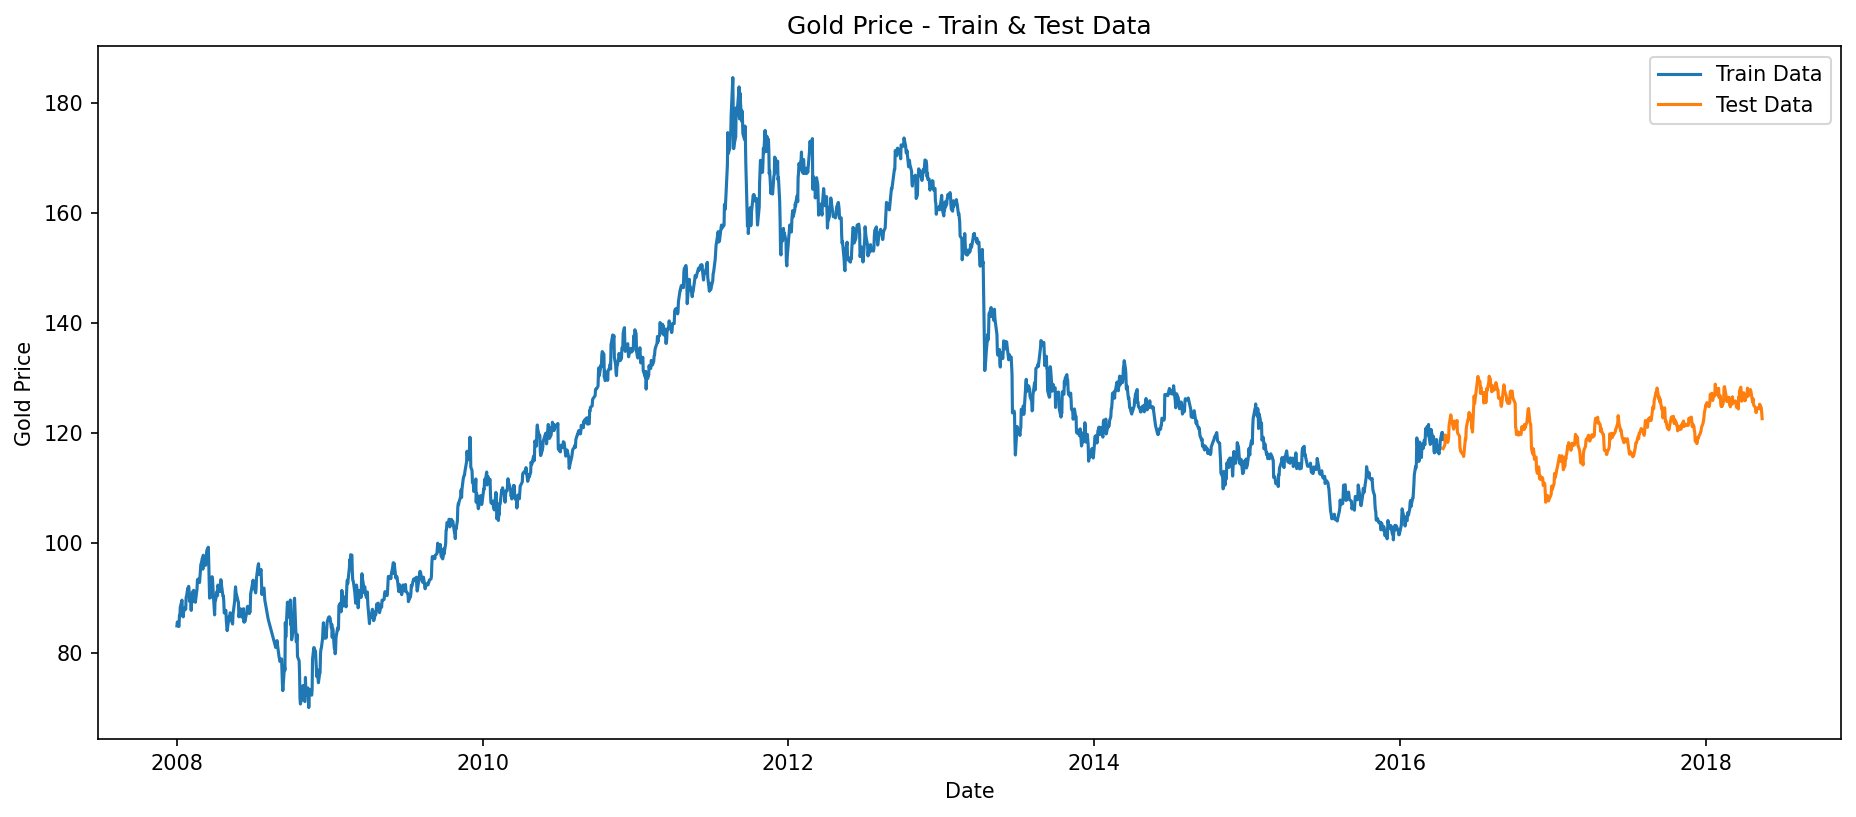

In [3]:
# Thiết lập kích thước biểu đồ với chiều rộng full (ví dụ 15 inch)
plt.figure(figsize=(15, 6), dpi=150)

# Vẽ biểu đồ cho tập huấn luyện (train)
plt.plot(train_data['GLD'], label='Train Data')

# Vẽ biểu đồ cho tập kiểm tra (test)
plt.plot(test_data['GLD'], label='Test Data')

# Thêm tiêu đề và nhãn
plt.title('Gold Price - Train & Test Data')
plt.xlabel('Date')
plt.ylabel('Gold Price')

# Chú thích
plt.legend()

# Hiển thị biểu đồ
plt.grid(color='white')
plt.show()

## 4. Thông tin chi tiết của tập Train và Test

In [4]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1832 entries, 2008-01-02 to 2016-04-13
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SPX      1832 non-null   float64
 1   GLD      1832 non-null   float64
 2   USO      1832 non-null   float64
 3   SLV      1832 non-null   float64
 4   EUR/USD  1832 non-null   float64
dtypes: float64(5)
memory usage: 85.9 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 458 entries, 2016-04-14 to 2018-05-16
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SPX      458 non-null    float64
 1   GLD      458 non-null    float64
 2   USO      458 non-null    float64
 3   SLV      458 non-null    float64
 4   EUR/USD  458 non-null    float64
dtypes: float64(5)
memory usage: 21.5 KB


### 5. Chuẩn hóa dữ liệu

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 6. Khởi tạo và huấn luyện mô hình KNN

In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

# Khởi tạo và train mô hình
# knn = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
# fit_model = knn.fit(X_train_scaled, y_train)

# Define RMSE scorer
def rmse_scorer(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

scorer = make_scorer(rmse_scorer, greater_is_better=False)

# GridSearchCV
param_grid = {
    'n_neighbors': range(1, 21),
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn = KNeighborsRegressor()
grid = GridSearchCV(knn, param_grid, scoring=scorer, cv=5)
grid.fit(X_train_scaled, y_train)

# Kết quả
print(f'Best parameters: {grid.best_params_}')
print(f'Best RMSE score (on training folds): {-grid.best_score_:.4f}')

# Lưu mô hình tốt nhất
knn = grid.best_estimator_

# Fit lại mô hình với tập huấn luyện đầy đủ
knn.fit(X_train_scaled, y_train)



Best parameters: {'metric': 'euclidean', 'n_neighbors': 2}
Best RMSE score (on training folds): 16.5346


c:\Users\HHunTTer\.conda\envs\lab-data-mining\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


KNeighborsRegressor(metric='euclidean', n_neighbors=2)

### 7. Dự đoán và tính toán các độ đo

In [7]:
# Dự đoán
y_pred = knn.predict(X_test_scaled)
y_true = y_test.values

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_true, y_pred) * 100 

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# R-squared (R²)
r2 = r2_score(y_true, y_pred)

print(f"MAE: {mae}")
print(f"MAPE: {mape}%")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 6.456100829694324
MAPE: 5.247992861472967%
RMSE: 7.414704503826018
R²: -1.3461435505089754


### 8. Biểu đồ dự đoán của mô hình

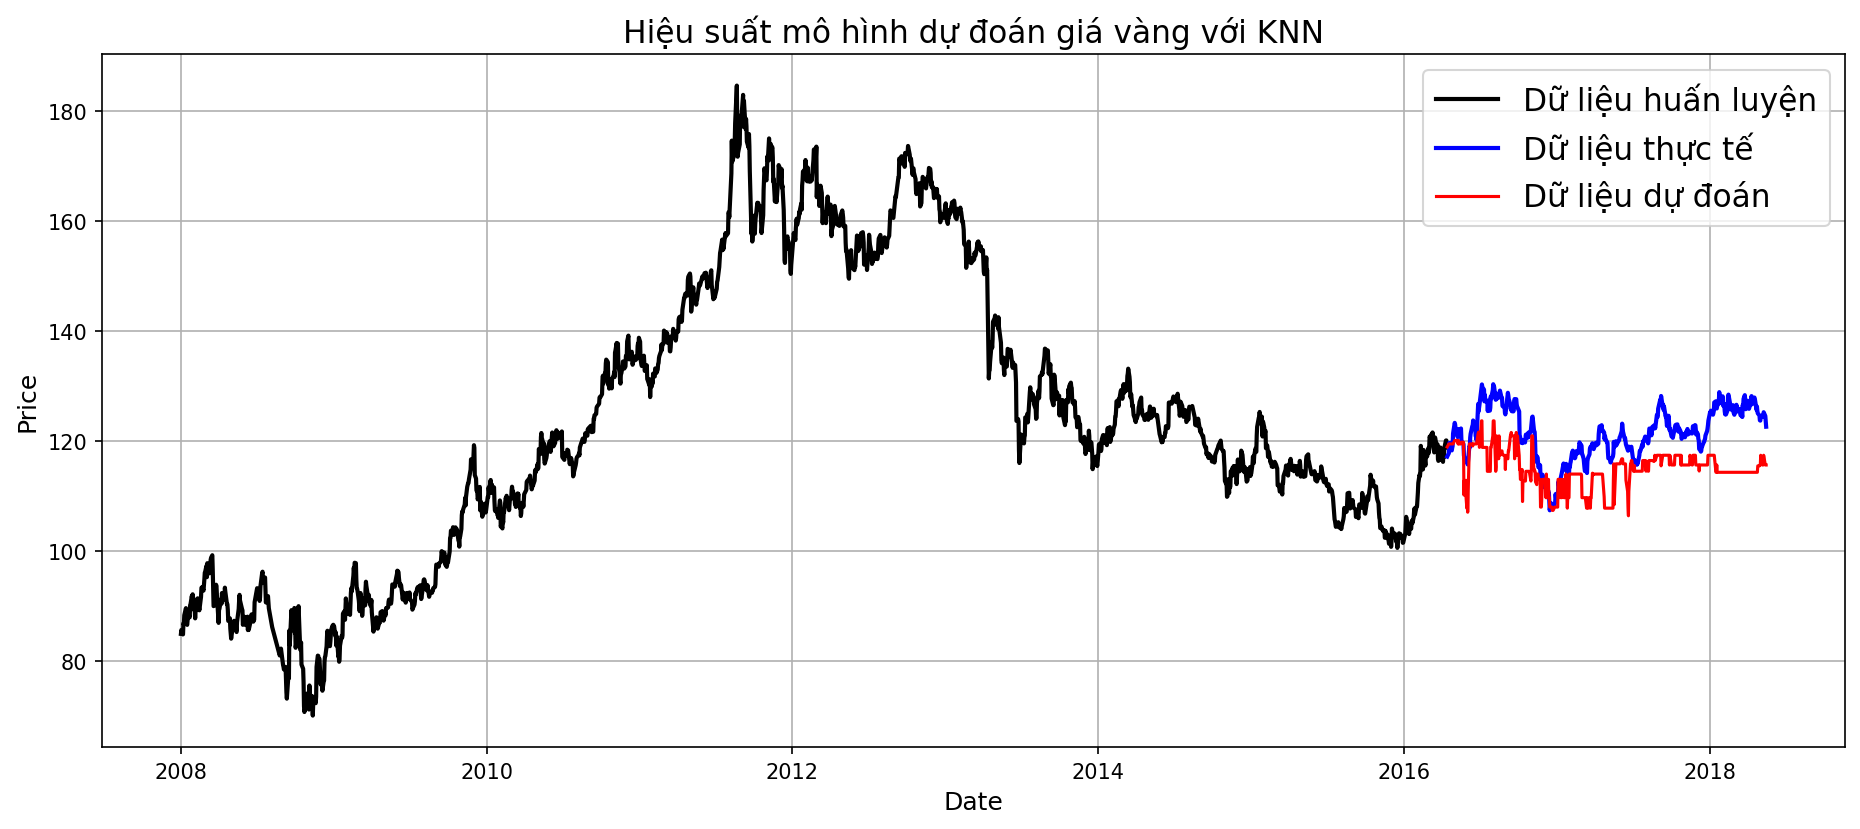

In [8]:
plt.figure(figsize=(15, 6), dpi=150)

# Vẽ dữ liệu huấn luyện
plt.plot(train_data.index, y_train.values, color='black', lw=2)

# Vẽ dữ liệu thực tế của tập kiểm tra
plt.plot(test_data.index, y_test, color='blue', lw=2)

# Vẽ dữ liệu dự đoán từ mô hình ETS
plt.plot(test_data.index, y_pred, label='Dữ liệu dự đoán', color='red')

# Tiêu đề và nhãn
plt.title('Hiệu suất mô hình dự đoán giá vàng với KNN', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)

# Chú thích
plt.legend(['Dữ liệu huấn luyện', 'Dữ liệu thực tế', 'Dữ liệu dự đoán'], prop={'size': 15})
plt.grid(True)
plt.show()